In [1]:
from mxnet import nd
import matplotlib.pyplot as plt

## __Defining Randomized Leaky Rectified Linear Unit function__

In [2]:
def rrelu(x, alpha):
    return nd.maximum(x, alpha * x)

Below we are generating x values from range -10 to 10 with subsequent value of 0.1, that is last point -10, then -10 + 0.1 = -9.9, then -9.9 + 0.1 = -9.8.... and so on. This is what nd.arange function does

In [5]:
alpha = nd.random.normal(0, 1, 1)
xs = nd.arange(-10, 10, 0.1)
ys = rrelu(xs, alpha)
print(f'alpha: {alpha.asscalar()}')

alpha: 0.4838046133518219


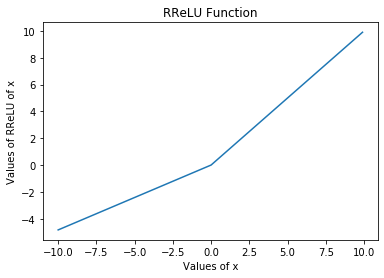

In [6]:
# matplotlib doesn't support mxnet's ndarray but it supports numpy's ndarray, so we need to convert xs and ys to numpy ndarray by calling .asnumpy() method
plt.plot(xs.asnumpy(), ys.asnumpy())
plt.xlabel('Values of x')
plt.ylabel('Values of RReLU of x')
plt.title('RReLU Function')
plt.show()

## __Visiualizing rrelu with random alphas__

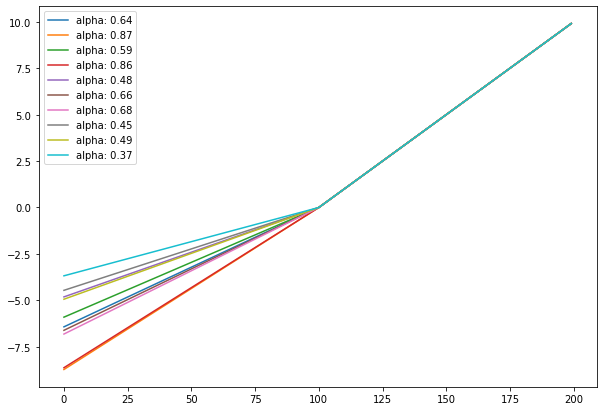

In [7]:
plt.figure(figsize = (10, 7))
alphas = nd.random.uniform(0.1, 1.0, 10)
for alpha in alphas:
    plt.plot(rrelu(xs, alpha).asnumpy(), label = f'alpha: {alpha.asscalar():.2f}')
plt.legend()
plt.show()

## __Now defining derivative of rrelu funciton__

In [8]:
def rrelu_derivative(x, alpha):
    return nd.where(x > 0, nd.ones_like(x), nd.ones_like(x) * alpha)

In [9]:
dxs = nd.arange(-10, 10, 0.1)
dys = rrelu_derivative(dxs, alpha)

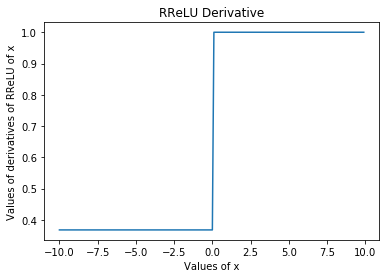

Note that mimum derivative is alpha(which is 0.367781... in above case) not zero as in relu


In [11]:
# matplotlib doesn't support mxnet's ndarray but it supports numpy's ndarray, so we need to convert xs and ys to numpy ndarray by calling .asnumpy() method
plt.plot(dxs.asnumpy(), dys.asnumpy())
plt.xlabel('Values of x')
plt.ylabel('Values of derivatives of RReLU of x')
plt.title('RReLU Derivative')
plt.show()

print(f'Note that mimum derivative is alpha(which is {alpha.asscalar():5f}... in above case) not zero as in relu')

## __Plotting RReLU function and it's derivative together__

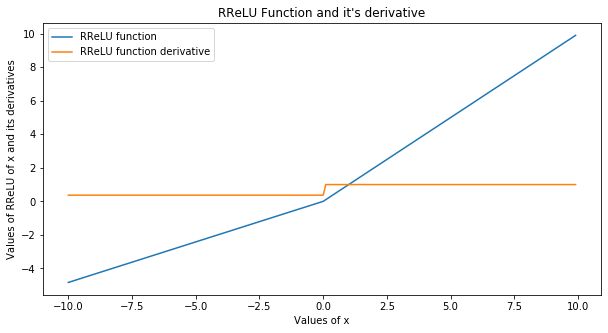

In [12]:
# matplotlib doesn't support mxnet's ndarray but it supports numpy's ndarray, so we need to convert xs and ys to numpy ndarray by calling .asnumpy() method
plt.figure(figsize = (10, 5))
plt.plot(xs.asnumpy(), ys.asnumpy(), label = 'RReLU function')
plt.plot(dxs.asnumpy(), dys.asnumpy(), label = 'RReLU function derivative')
plt.xlabel('Values of x')
plt.ylabel('Values of RReLU of x and its derivatives')
plt.title("RReLU Function and it's derivative")
plt.legend()
plt.show()

In [13]:
dys.max().asscalar() 

1.0